<a href="https://colab.research.google.com/github/Architag1503/Colab/blob/main/InsuranceProjectWithLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('/content/drive/MyDrive/dataset/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **EDA**

steps:
1. see shape (df.shape)
2. see head  (df.head())
3. see info  (df.info())
4. see description (df.describe())
5. see null values (df.isnull().sum())
6. Visulaize numeric data on diffeent plots
7. Visulaize non-numeric data by ther count
8. Find correltion between data using heatmap
9. Do encodig of data (convert string to numeric)
10. Feature Engineering & Extraction
11. Feature Scaling (if data contains distances or weights like in our case it is charges)

In [45]:
df.shape

(1338, 7)

In [46]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [48]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [49]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [50]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# **Data Visualization**

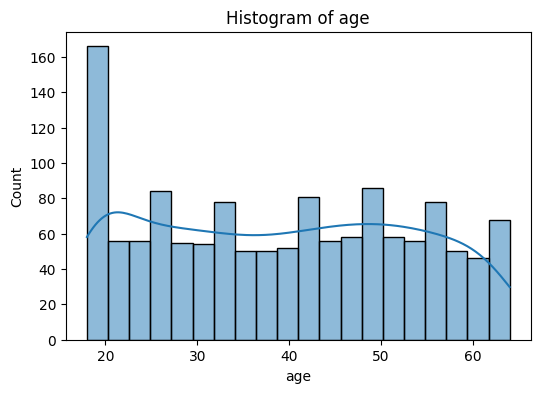

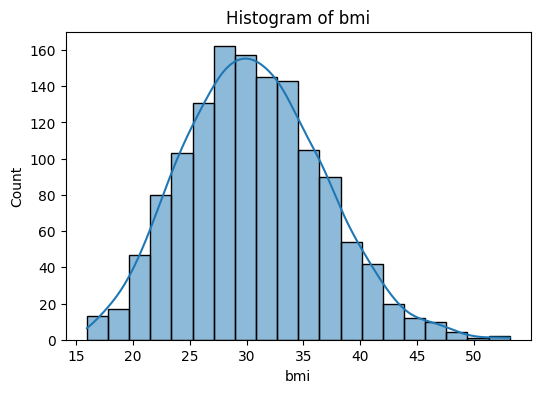

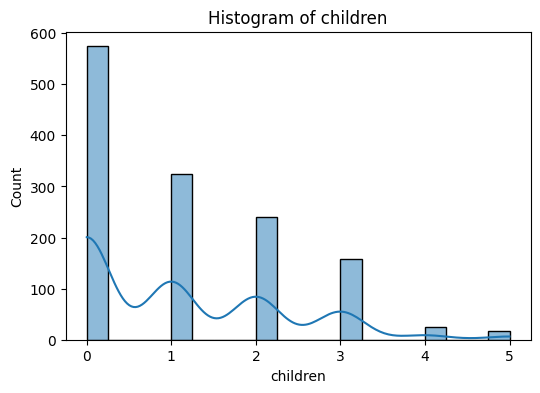

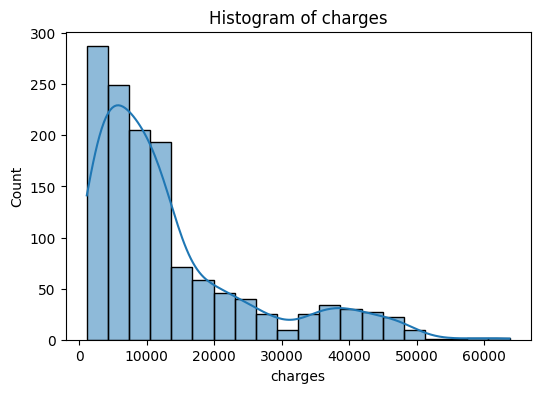

In [51]:
numeric_columns = ['age', 'bmi', 'children', 'charges']

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Histogram of {col}")
    plt.show()


<Axes: xlabel='children', ylabel='count'>

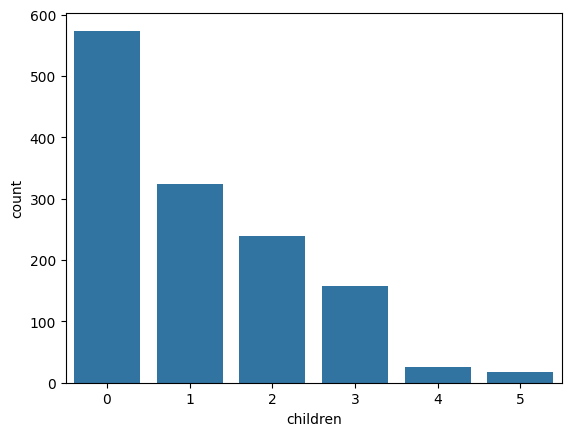

In [52]:
sns.countplot(x = df['children'])

<Axes: xlabel='sex', ylabel='count'>

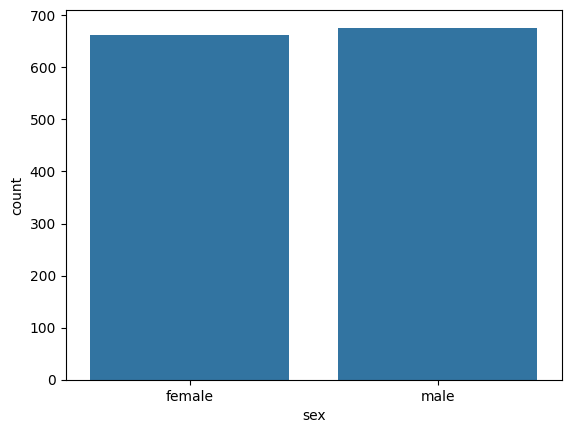

In [53]:
sns.countplot(x = df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

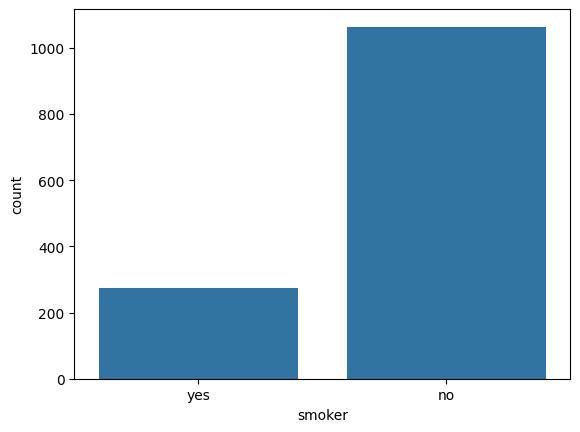

In [54]:
sns.countplot(x=df['smoker'])

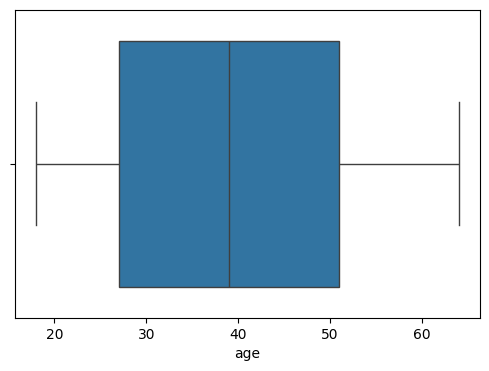

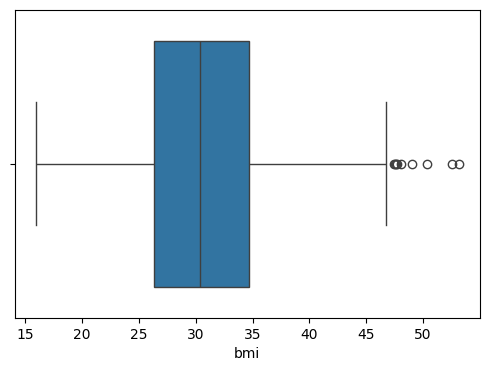

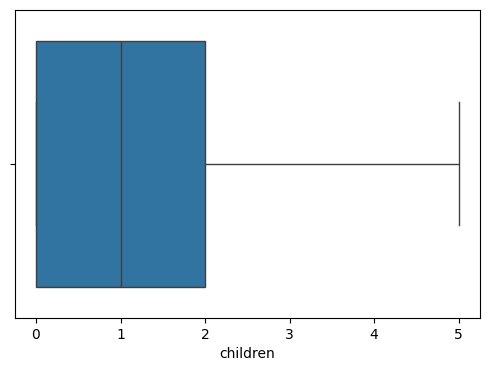

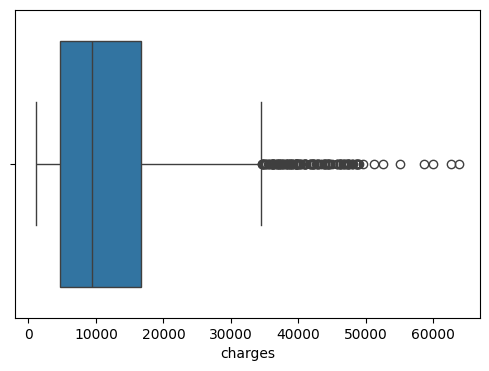

In [55]:
for col in numeric_columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(x = df[col])

<Axes: >

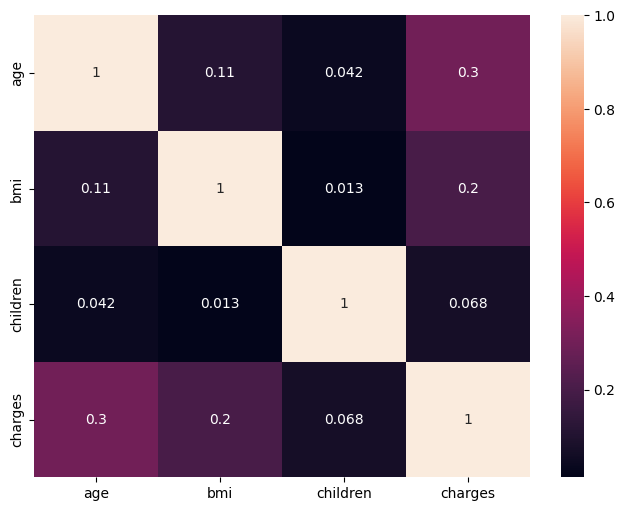

In [56]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr( numeric_only=True) , annot=True)

# **Data Cleaning and Preprocessing**

In [57]:
df_cleaned = df.copy()

In [58]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
df_cleaned.drop_duplicates(inplace = True)

In [60]:
df_cleaned.shape

(1337, 7)

In [61]:
df_cleaned.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [62]:
df_cleaned.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [63]:
df_cleaned['sex'].value_counts() # Male & male treat differently thats why i am checking

,count
sex,
male,675
female,662


# **Encoding of Data**

In [64]:
df_cleaned['sex'] = df_cleaned['sex'].map({'male' : 0 , 'female':1})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [65]:
df_cleaned['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [66]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({'yes' : 1 , 'no' : 0})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [67]:
df_cleaned.rename(columns = {'smoker' : 'is_smoker' , 'sex' : 'is_female'}, inplace = True)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [68]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [69]:
#Do hot-label encodeing on region
df_cleaned = pd.get_dummies(df_cleaned ,  columns=['region'] , drop_first=True)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [70]:
df_cleaned = df_cleaned.astype(int)
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


# **Feature Engineeering & Extraction**

In [71]:
df_cleaned['bmi_category'] = pd.cut(
                                      df_cleaned['bmi'] ,
                                      bins=[0 , 18.5 , 24.9 , 29.9 , float('inf')] ,
                                      labels=['Underweight' , 'Normal' , 'Overweight' , 'Obese']
                                    )
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight


In [72]:
df_cleaned = pd.get_dummies(df_cleaned , columns=['bmi_category'] , drop_first=True)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False


In [73]:
df_cleaned = df_cleaned.astype(int)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


In [74]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [75]:
from sklearn.preprocessing import StandardScaler
cols = ['age' , 'bmi' , 'children']
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [76]:
from scipy.stats import pearsonr

#Pearson Correlation Calculation

#List of Features to check against target
selected_features = ['age' , 'bmi' , 'children' , 'is_female' , 'is_smoker' ,
                     'region_northwest' , 'region_southeast' , 'region_southwest' ,
                     'bmi_category_Normal' , 'bmi_category_Overweight' , 'bmi_category_Obese']

correlations = {
    feature: pearsonr(df_cleaned[feature] , df_cleaned['charges'])[0]
    for feature in selected_features
}

correlation_df = pd.DataFrame(list(correlations.items()) , columns=['Feature' , 'Pearson Correlation'])
correlation_df.sort_values(by = 'Pearson Correlation' , ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obese,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi_category_Normal,-0.104042


In [77]:
cat_features = ['is_female' , 'is_smoker' ,
                     'region_northwest' , 'region_southeast' , 'region_southwest' ,
                     'bmi_category_Normal' , 'bmi_category_Overweight' , 'bmi_category_Obese']

In [78]:
#The Chi-Square test is used to check whether two categorical variables are related (dependent) or independent.
#It tells us whether an observed pattern happened by chance or due to a real relationship.

from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05
df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'] , q=4 , labels=False)
chi2_results = {}

for col in cat_features:
    contingency_table = pd.crosstab(df_cleaned[col] , df_cleaned['charges_bin'])
    chi2_stat , p_val , _, _ = chi2_contingency(contingency_table)
    decision = 'Reject Null (keep Features)' if p_val < alpha else 'Accept Null (Drop Features)'
    chi2_results[col] = {'Chi2 Statistic': chi2_stat, 'p-value': p_val , 'Decision': decision}

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p-value')
chi2_df

,Chi2 Statistic,p-value,Decision
is_smoker,848.219178,0.0,Reject Null (keep Features)
region_southeast,15.998167,0.001135,Reject Null (keep Features)
is_female,10.258784,0.01649,Reject Null (keep Features)
bmi_category_Obese,8.515711,0.036473,Reject Null (keep Features)
region_southwest,5.091893,0.165191,Accept Null (Drop Features)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Features)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Features)
region_northwest,1.13424,0.768815,Accept Null (Drop Features)


In [79]:
final_df = df_cleaned[['age' , 'is_female' , 'bmi' , 'children' ,  'is_smoker' , 'charges'
                       , 'region_southeast' , 'bmi_category_Obese']]

final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x = final_df.drop('charges' , axis = 1)
y = final_df['charges']

In [82]:
X_train , X_test , y_train , y_test = train_test_split(x , y , test_size=0.20 , random_state=42)


In [83]:
from sklearn.linear_model import LinearRegression


In [84]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [85]:
y_pred = model.predict(X_test)
y_pred

array([ 7856.41808069,  5379.07145062, 14613.47489419, 32465.93193508,
        8955.35729283, 13336.43605749, 30199.07309038,  1403.40503994,
       11196.90873514, 10018.65838301, 10818.71629044, 32144.43533014,
       31550.26059902, 16230.55597963, 10285.99989714,  8488.6608457 ,
        5487.64476113, 32465.09672212,  3304.46601962,  3877.00422671,
        4760.01023433, 28796.29743032, 13870.98195763, 29541.88243902,
       31520.15678042,  6344.44675222, 35026.69683204, 37880.73853364,
       12490.06211178, 14238.95332785,  7573.09915473, 13049.08020135,
         516.21534048, 11339.74207305, 37584.28749479, 13356.84393437,
        3706.96614326,  4537.12786929, 31481.80485676,  8009.55465514,
        6075.79442888, 30404.81913857, 35276.56346051, 13099.59189682,
        7977.69705664,  2987.00634487,  5174.11237148,  7620.54073087,
        3522.89053725, 10388.99625751,  7820.00530896, 10505.68054495,
       30331.09138384,  4687.62077185, 11676.0149257 , 11446.77536361,
      

In [86]:
y_test

,charges
900,8688
1064,5708
1256,11436
298,38746
237,4463
...,...
534,13831
542,13887
760,3925
1284,47403


In [91]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test , y_pred)
print("R^2 : " , r2)

n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("adjusted R^2 : " , adjusted_r2)

R^2 :  0.8040712413347119
adjusted R^2 :  0.7987962362937233
